# Dynamic or Live update of a Plot in Python

In my work I am often required to visualize how the data or some aspect of model changes. This requires to have plots/graph which get Dynamically or Live updates. This notebook is about how to plot such graphs

Imagine we have a 2D matrix A of (m x n) dimension where each row is a set of values. We record the initial set of values, Then these values get updated, then the update happens again, and again. Row 1 stores the initial values, row 2 stores the subsequent updated values, row 3 stores values after next update, so on and so forth. 

In esence, the matrix A stores the entire history of values. Now we will like to plot these values. Where the graph starts with values in first row, then gets updated to values in 2nd row, then gets updated tp values in 3rd row, so on and so forth. 

[This is especially useful in machine learning, where you want to visualize how a particular property of model/data evolves with time (training) ]

In [1]:
## Below is one way to do it

In [2]:
# we create a matrix of 10 x 4 - 
import random
N = 40
M = 100
a = [[random.random() for i in range(N)] for j in range(M)]

#print a

<IPython.core.display.Javascript object>


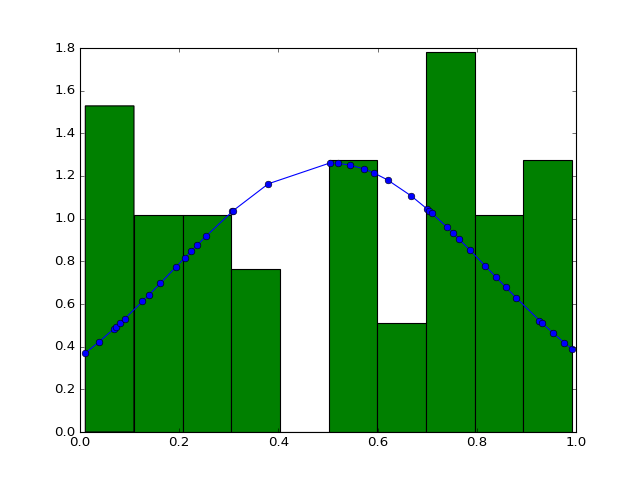

In [ ]:
# now plot a dynamic graph

#first the imports 
%matplotlib notebook
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import time

#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

#iterate - plot, erase
for i in range(0,M):
    #print i
    ax.clear() # - Clear
    h = sorted(a[i])
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    ax.plot(h,fit,'-o') # fit the line
    ax.hist(h,normed=True) # fit the histogram
    fig.canvas.draw()   # draw
    time.sleep(0.5)    #sleep

In [ ]:
# lets do the same thing, but this time the sleep of until user presses the key - Good old elementry C code way

In [ ]:
#first the imports 
#%matplotlib notebook  # this is super important
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import time

#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

#iterate - plot, erase
for i in range(0,M):
    #print i
    ax.clear() # - Clear
    h = sorted(a[i])
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    ax.plot(h,fit,'-o') # fit the line
    ax.hist(h,normed=True) # fit the histogram
    fig.canvas.draw()   # draw
    #time.sleep(0.5)    #sleep
    x = raw_input()     # this is python's way taking user input and wait unitl it gets the input.  
    
#The loop will run once, and wait for you to hit enter key, then next iteration 

In [ ]:
# another example

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    #print i
    ax.clear()
    #ax.plot(matrix[i,:])
    ax.plot(matrix[i])
    fig.canvas.draw()
    time.sleep(0.5)


Tried couple of other ways - but as of now this is the best way

Tried _plotly_ - 
https://plot.ly/python/sending-data-to-charts/

The problem I was facing was Though the data goes to the intended plot. 
py.plot() creates a new graph object everytime. 

Below is the code I tried
    



In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

data = Data([ Scatter(x=[1, 2], y=[3, 4]) ])

plot_url = py.plot(data, filename='my plot')

#for i in range(0,3):
    data = Data([ Scatter(x=[1, 2], y=[3, 4]) ])
    url = py.plot(data, filename='my plot')
    url.refresh()
    
    

    
    
    